In [66]:
"""
Machine Learning Homework 4
Done by:
Mariana Santana 106992
Pedro Leal 106154
LEIC-A
"""

'\nMachine Learning Homework 4\nDone by:\nMariana Santana 106992\nPedro Leal 106154\nLEIC-A\n'

#### II. Programming and critical analysis
#### In the next exercise you will use the accounts.csv dataset. This dataset contains account details of bank clients, and the target variable y is binary (‘has the client subscribed a term deposit?’). 


In [67]:
"""
General imports and variables for all exercises; run this cell before any other
"""
import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

df = pd.read_csv('accounts.csv')

X = df.drop(columns='deposit')
y = df['deposit']

#### 1) [4v] Select the first 8 features and remove duplicates and null values. Normalize the data using MinMaxScaler. Using sklearn, apply k-means clustering (without targets) on the normalized data with k= {2,3,4,5,6,7,8}. Apply k-means randomly initialized, using max_iter = 500 and random_state = 42. Plot the different sum of squared errors (SSE) using the _inertia attribute of k-means according to the number of clusters. Hint: You can use get_dummies() to change the feature type from categorical to numerical (e.g. pd.get_dummies(data, drop_first=True)). 

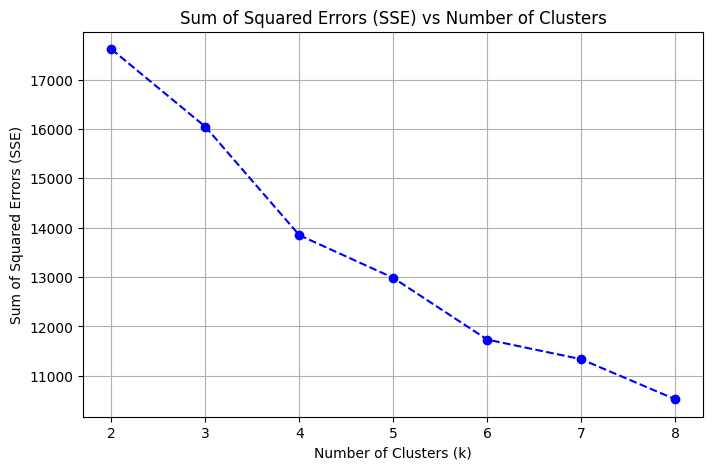

In [68]:
df_selected = df.iloc[:, :8]

df_selected = df_selected.drop_duplicates()
df_selected = df_selected.dropna()

df_dummies = pd.get_dummies(df_selected, drop_first=True)

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_dummies)

sse = []

k_values = [2, 3, 4, 5, 6, 7, 8]
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(df_normalized)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='--', color='b')
plt.title('Sum of Squared Errors (SSE) vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### 2) [1.5v] According to the previous plot, how many underlying customer segments (clusters) should there be ? Explain based on the trade off between the clusters and inertia. 


The plot generated above, shows the SSE or inertia as a function of the number of clusters (k) in a K-Means clustering model.

Generally and as seen in the plot, the SSE decreases as the number of clusters incresases because the points are closer to their respective centroids resulting in smaller and more exact clusters. 
According to the knee/elbow method, there is a point where SSE reductions slows down, meaning that adding more cluster doesn't benefit the model significantly. For this example, that happens for a k value of 4, because for smaller k values the function's slope is around -2000 and for larger values is around -1000. This increase in the slope's value means that the difference in the SSE gets less significant as doesn't justify adding more clusters to the model.

Given this, 4 is the optimal number of clusters for this model because it provides both a low value for SSE and a well fitted model (a lower mumber of clusters means that the model doesn't categorize its data well enough leading to underfitting and a higher number of clusters leads to clusters that are too specific and not meaningful which can cause overfitting).

#### 3) [1.5v] Would k-modes be a better clustering approach ? Explain why based on the dataset features. 

The k-means and k-modes models are used in almost the same way but differ in the most appropriate type of data for each one.
The k-means operates better for numerical features while k-modes works better for categorical data.

This happens because k-means optimizes clustering by minimizing the variance between data points using Euclidean distance, while k-modes uses the most frequent category to determine cluster centroids.

Given this, after analysing the accounts.csv dataset, we noticed that many of its features (such as job, marital, education, housing, loan, etc) are categorical which matches better with the k-modes model. 
Having used pd.get_dummies() in exercise 1, also means that the type of features in our dataset doesn't match the k-means model appropriately (because this function is used to change categorical variables to numerical at the expense of the model's simplicity as it gets more complex and the relations between features may get distorted and give worst performance to the overall model).

In conclusion, the model must be chosen with the dataset's features types in mind and in this case k-modes makes more sense.

#### 4) [2v] Apply PCA to the data :
#### a. Use StandardScaler to scale the data before you apply fit_transform. How much variability is explained by the top 2 components ?

In [69]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies)

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_scaled)

explained_variance = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance)

print(f"Explained variance by the top 2 components: {explained_variance}")
print(f"Total variability explained by the top 2 components: {total_variance_explained * 100:.2f}%")

Explained variance by the top 2 components: [0.11679024 0.11075988]
Total variability explained by the top 2 components: 22.76%


When applying Principal Component Analysis (PCA) the data is transformed into principal components that capture the data's variance.

With the results from the previous exercise, the top 2 components only capture variances of 11.679% and 11.076% meaning that only 22.76% of the global variance is captured in total. Given this, we conclude that the dataset has high dimensionality which means that important patterns and structures could only be captured by adding more components to the analysis. Although many information is lost in this process the data is simplified and easier to interpret as we'll see in the next exercise.

In conclusion, 2 components is not enough to get a comprehensive view of the dataset (for this to occur the total variability should be around 80% to 90%) but, to get results that can be easily converted into plots and interpreted 2 or 3 is the maximum number of components that can be analysed.

#### b. Provide a scatterplot according to the first 2 principal components and color the points according to k=3 clusters. Can we clearly separate the clusters ? Justify.

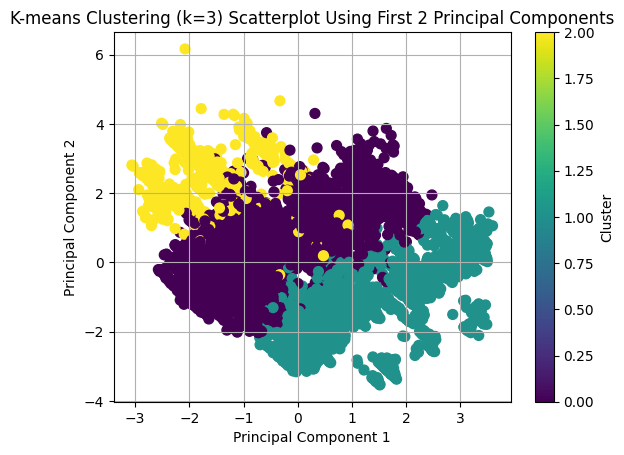

In [70]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)
labels = kmeans.labels_ 

plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=labels, cmap='viridis', s=50)

plt.title("K-means Clustering (k=3) Scatterplot Using First 2 Principal Components")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

The scatterplot above shows the clusters generated when analysing the 2 components mentioned in the previous exercise.

Upon looking at the plot, we can see that the points from each cluster are grouped fairly well inside the cluster that they belong to. However, we see that there is some overlap in the clusters especially with the purple one (overlaps both the yellow and teal clusters). This means that there isn't a distinct separation between them, due to only having 2 principal components to provide variance to the analysis. 

Given this, we assessed that the 22.76% of total variance achieved with the first 2 principal components is not enough to fully separate them from eachother but it's still possible to distinguish the cluster that they belong to so the clusters are considered to be separated enough.  

#### 5) [2v] Plot the cluster conditional features of the frequencies of “job” and ”education” according to k-means, with multiple="dodge", stat='density', shrink=0.8, common_norm=False. Analyze the frequency plots using sns.displot, (see Data Exploration notebook). Describe the main differences between the clusters in no more than half page. 


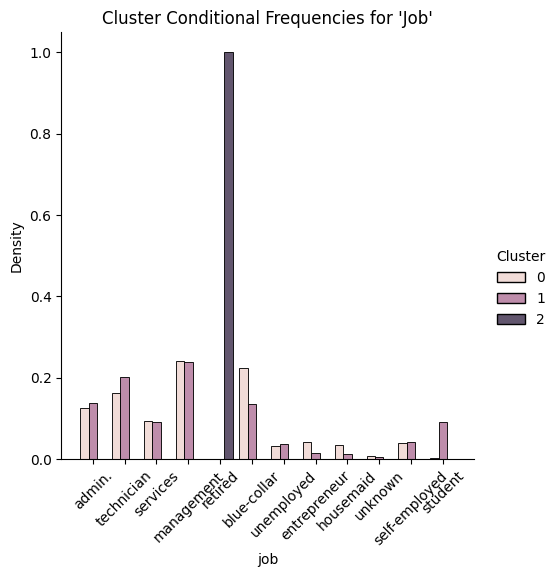

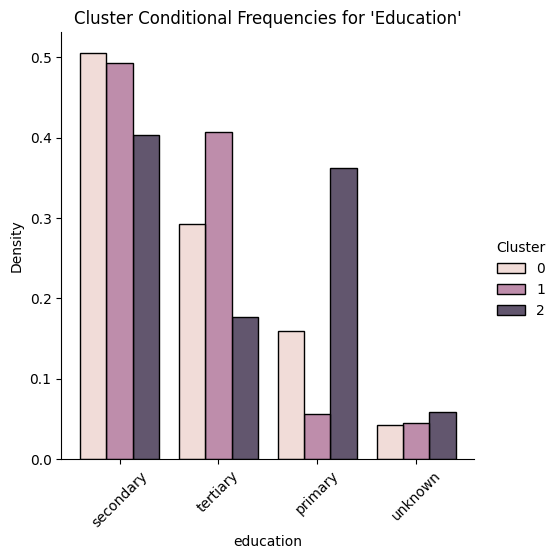

In [71]:
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)

sns.displot(data=df_selected, x='job', hue='Cluster', multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.title("Cluster Conditional Frequencies for 'Job'")
plt.xticks(rotation=45)
plt.show()

sns.displot(data=df_selected, x='education', hue='Cluster', multiple="dodge", stat="density", shrink=0.8, common_norm=False)
plt.title("Cluster Conditional Frequencies for 'Education'")
plt.xticks(rotation=45)
plt.show()

Based on the plots above, we can see the main differences between the 3 clusters.

When looking at the Job plot, we can split our analysis into the the 3 clusters. 
The most significant bar in the plot belongs to cluster 2 and it means that the retired individuals dominate this cluster. 
The other two clusters are distributed more equally between the remaining categories, specially "admin", "technician", "blue-collar", "services" and "management". Cluster 1, has a majority of the observations for the first two categories and for the "student" part of the sample. Meanwhile, cluster 0 represent better the other categories as its conditional frequency is higher than the other clusters'.
The categories "unenployed", "entrepeneur", "housemaid", "unknown" and "self-employed" have lower conditional frequencies for all clusters which means that these categories are less likely to subscribe a term deposit.

When looking at the Education plot and analysing the cluster 0, we notice that it has the highest proportion of individuals with "secondary" education and a significant part of people with "tertiary" education and the conditional frequency is lower for the other two categories. Similarly, cluster 1 also has big relevance for "secondary" and "tertiary" educations with enfasis on the "tertiary" (where its smaller than "secondary" but the largest inside the category by a large difference). Meanwhile, cluster 2 has the lower conditional frequency of the three for the first two categories (that are dominated by the other tw clusters) but contains most of the observations of individuals with "primary" education.
The "unknown" category has a small number of observations for all the clusters and its less meaningful for this analysis.

Given this, cluster 2 represents mainly retired individuals with primary or unknown education, cluster 0 captures a higher proportion of working professionals ("blue-collar", "services" and "management") with secondary or tertiary education while cluster 1 is more diverse, with the majority of "admin" and "services" jobs and individuals with secondary and tertiary education.